In [1]:
# Aqui estamos importando a função para montar o drive do google no colab
from google.colab import drive

# Monta o Google Drive para acessar os dados
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importa a biblioteca pandas para a manipulação de dados
import pandas as pd
# Importa a biblioteca numpy para operações matemáticas
import numpy as np
# Importa a biblioteca matplotlib para visualização de gráficos
import matplotlib.pyplot as plt
# Importa a biblioteca seaborn para visualização de dados estatísticos
import seaborn as sns

In [98]:
# Define o caminho para o arquivo CSV que será lido
caminho = ("/content/drive/MyDrive/Ciência de Dados/Curso - Introdução a Machine Learning/Módulo 2 - Métodos de Aprendizado de Máquina e suas Aplicações/ARIMA/AAPL_historical_data.csv")

# Lê o arquivo CSV e armazena os dados em um DataFrame chamado 'df'
df = pd.read_csv(caminho)

In [4]:
# Apresenta o dataframe
display(df)

,Date,Open,High,Low,Close
0,1980-12-12 00:00:00-05:00,0.098834,0.099264,0.098834,0.098834
1,1980-12-15 00:00:00-05:00,0.094108,0.094108,0.093678,0.093678
2,1980-12-16 00:00:00-05:00,0.087232,0.087232,0.086802,0.086802
3,1980-12-17 00:00:00-05:00,0.088951,0.089381,0.088951,0.088951
4,1980-12-18 00:00:00-05:00,0.091530,0.091959,0.091530,0.091530
...,...,...,...,...,...
11089,2024-12-09 00:00:00-05:00,241.830002,247.240005,241.750000,246.750000
11090,2024-12-10 00:00:00-05:00,246.889999,248.210007,245.339996,247.770004
11091,2024-12-11 00:00:00-05:00,247.960007,250.800003,246.259995,246.490005
11092,2024-12-12 00:00:00-05:00,246.889999,248.740005,245.679993,247.960007


In [5]:
df.tail()

,Date,Open,High,Low,Close
11089,2024-12-09 00:00:00-05:00,241.830002,247.240005,241.750000,246.750000
11090,2024-12-10 00:00:00-05:00,246.889999,248.210007,245.339996,247.770004
11091,2024-12-11 00:00:00-05:00,247.960007,250.800003,246.259995,246.490005
11092,2024-12-12 00:00:00-05:00,246.889999,248.740005,245.679993,247.960007
11093,2024-12-13 00:00:00-05:00,247.820007,249.289993,246.240005,248.130005


In [6]:
# Exibe informações resumidas sobre o DataFrame 'df', incluindo o número de entradas, tipos de dados das colunas e a quantidade de valores não nulos em cada coluna.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    11094 non-null  object 
 1   Open    11094 non-null  float64
 2   High    11094 non-null  float64
 3   Low     11094 non-null  float64
 4   Close   11094 non-null  float64
dtypes: float64(4), object(1)
memory usage: 433.5+ KB


In [ ]:
df.describe()

,Open,High,Low,Close
count,11094.000000,11094.000000,11094.000000,11094.000000
mean,23.236654,23.484468,23.001626,23.254564
std,49.129620,49.645173,48.654514,49.178271
min,0.038245,0.038245,0.037815,0.037815
25%,0.242896,0.248067,0.237920,0.242953
50%,0.442782,0.451501,0.435876,0.444634
75%,18.083088,18.278464,17.904287,18.107803
max,247.960007,250.800003,246.259995,248.130005


In [99]:
# Convertendo a coluna 'Date' para o tipo datetime
df['Date'] = pd.to_datetime(df['Date'], utc=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   Date    11094 non-null  datetime64[ns, UTC]
 1   Open    11094 non-null  float64            
 2   High    11094 non-null  float64            
 3   Low     11094 non-null  float64            
 4   Close   11094 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(4)
memory usage: 433.5 KB


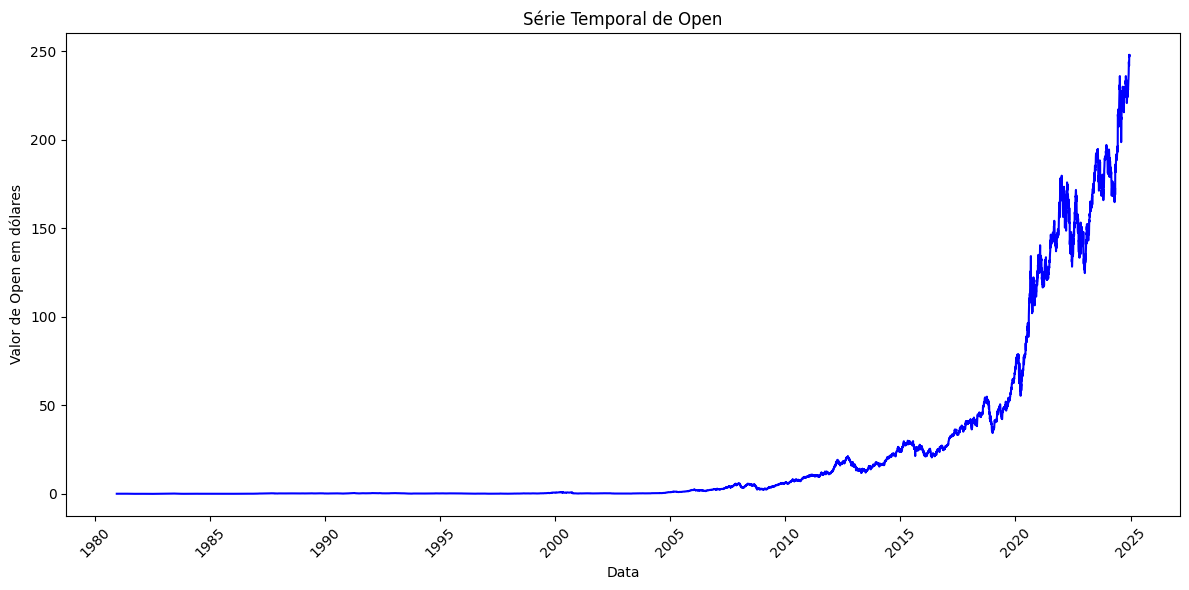

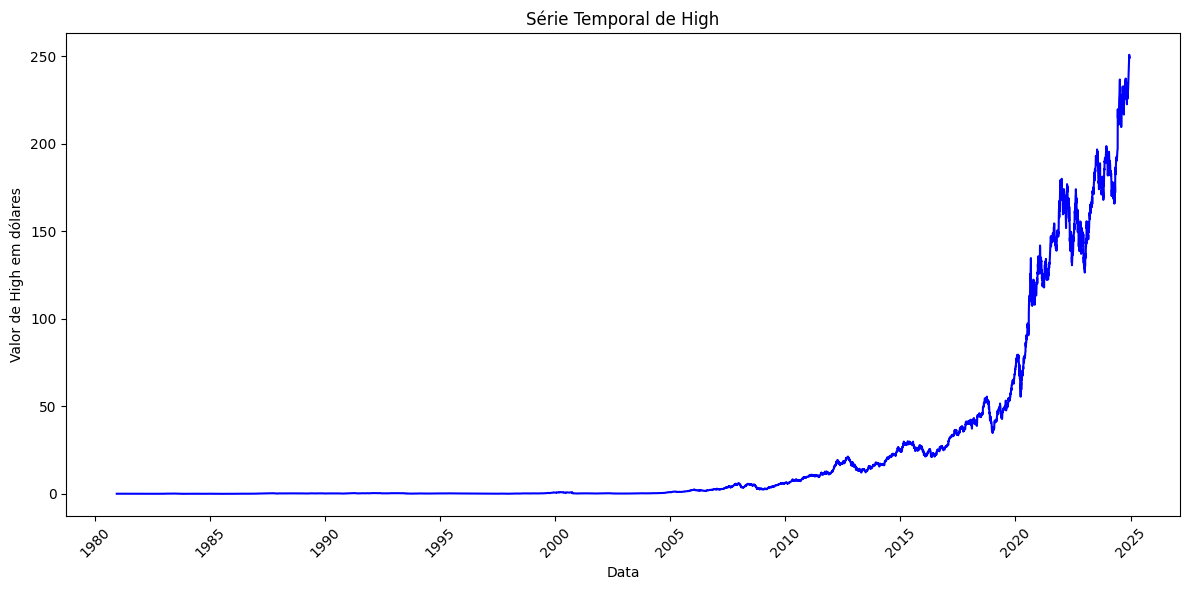

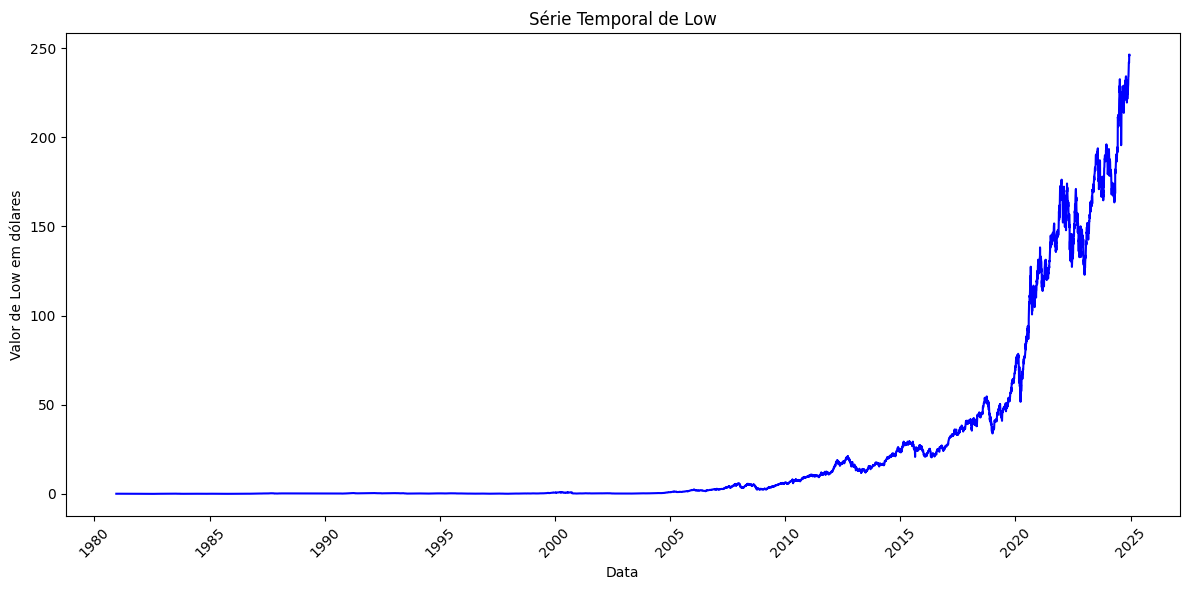

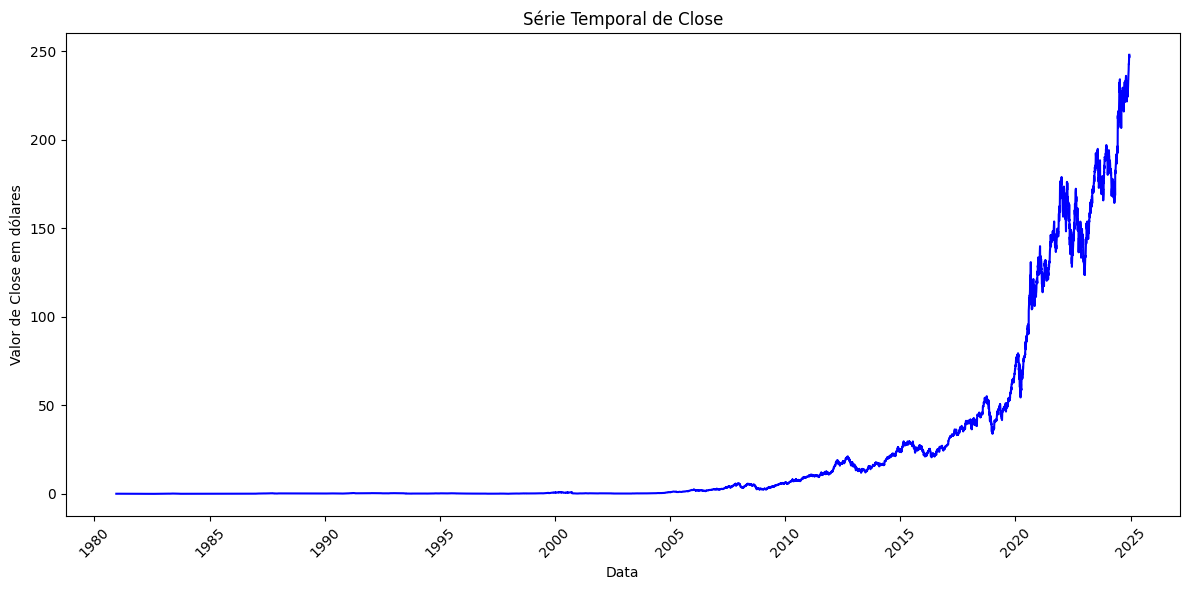

In [9]:
# Criando um novo DataFrame sem a coluna 'Date' usando drop
df_sem_date = df.drop('Date', axis=1)

# Agora, iteramos pelas colunas do novo DataFrame
for column in df_sem_date.columns:
    # Definir o tamanho da figura
    plt.figure(figsize=(12, 6))

    # Plotar a série temporal da coluna atual
    plt.plot(df['Date'], df[column], linestyle='-', color='b')

    # Adicionar título e rótulos aos eixos
    plt.title(f'Série Temporal de {column}')
    plt.xlabel('Data')
    plt.ylabel(f'Valor de {column} em dólares')

    # Formatar as datas no eixo x para melhor legibilidade
    plt.xticks(rotation=45)

    # Ajustar o layout para evitar cortes
    plt.tight_layout()

    # Mostrar o gráfico
    plt.show()

In [100]:
# Definir a data de início do filtro
data_inicio = '2016-01-01'

# Filtrar o DataFrame
df_filtrado = df[df['Date'] >= data_inicio]

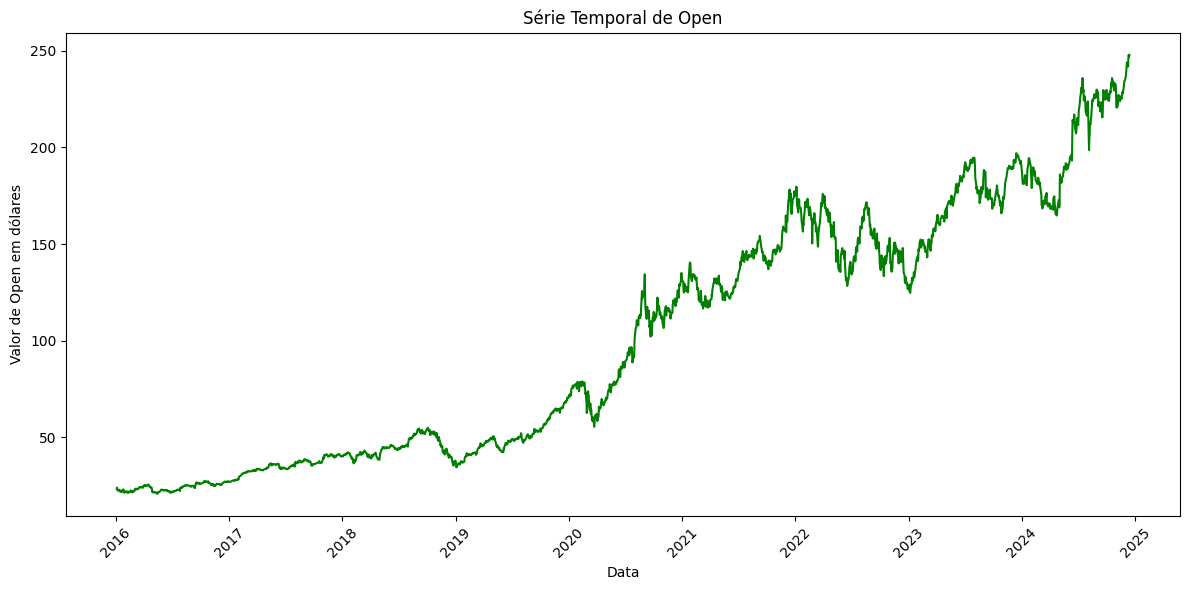

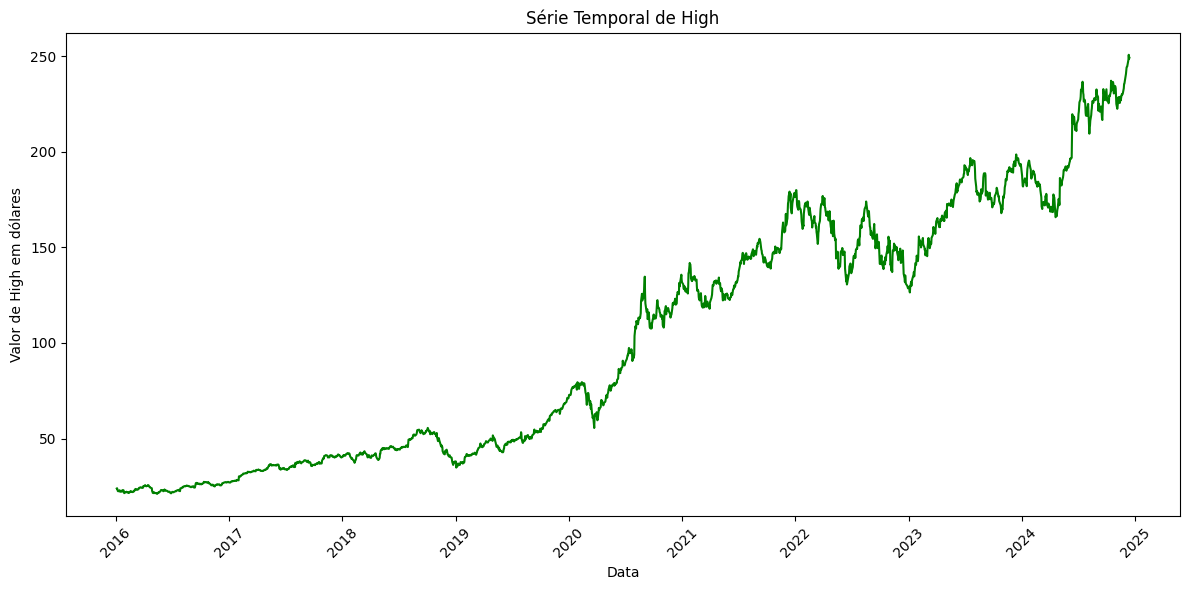

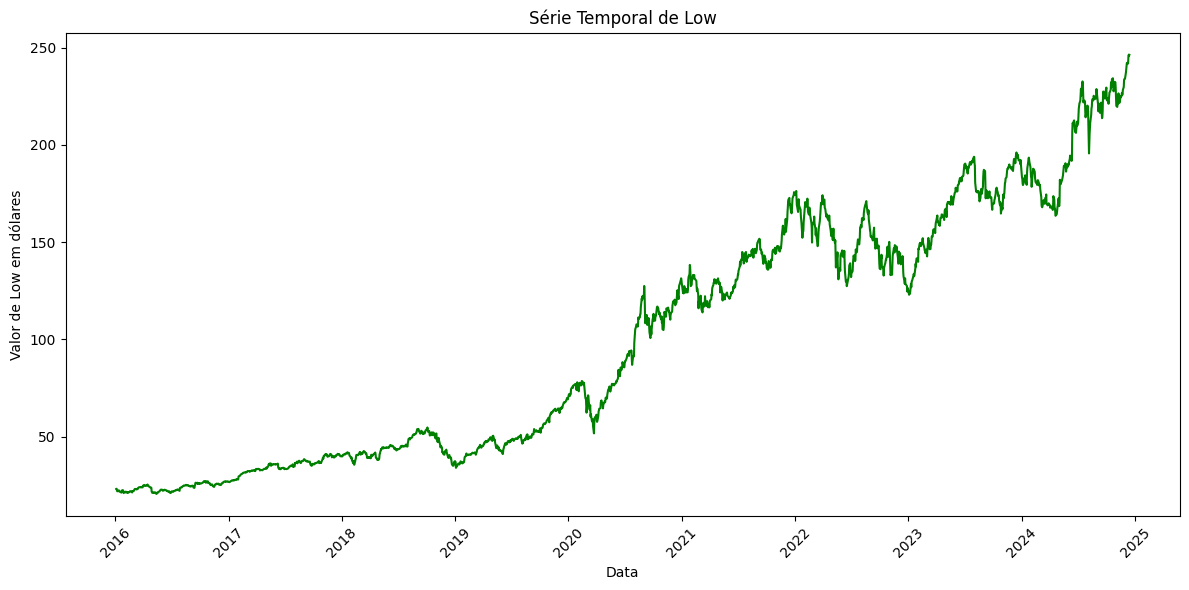

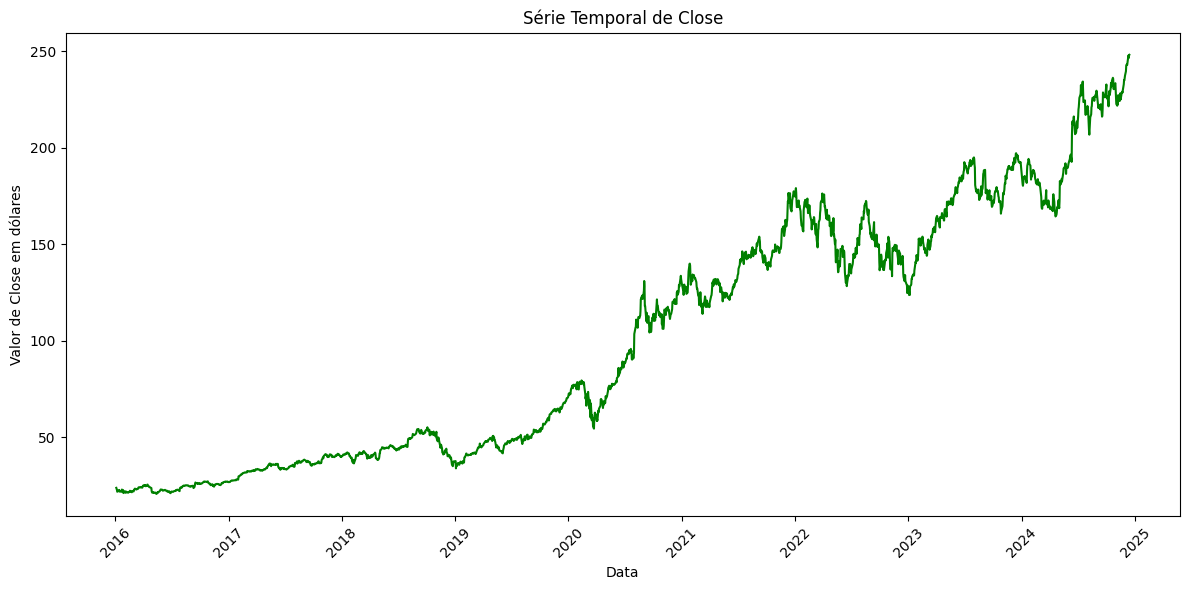

In [101]:
# Criando um novo DataFrame sem a coluna 'Date' usando drop
df_filtrado_sem_date = df_filtrado.drop('Date', axis=1)

# Agora, iteramos pelas colunas do novo DataFrame
for column in df_filtrado_sem_date.columns:
    # Definir o tamanho da figura
    plt.figure(figsize=(12, 6))

    # Plotar a série temporal da coluna atual
    plt.plot(df_filtrado['Date'], df_filtrado[column], linestyle='-', color='g')

    # Adicionar título e rótulos aos eixos
    plt.title(f'Série Temporal de {column}')
    plt.xlabel('Data')
    plt.ylabel(f'Valor de {column} em dólares')

    # Formatar as datas no eixo x para melhor legibilidade
    plt.xticks(rotation=45)

    # Ajustar o layout para evitar cortes
    plt.tight_layout()

    # Mostrar o gráfico
    plt.show()

In [102]:
#Definindo o índice para a data
df_filtrado = df_filtrado.set_index('Date')

In [104]:
# Convertendo para frequencia Business Days e preenchendo os dados faltantes
df_filtrado = df_filtrado.asfreq('B').interpolate()

In [105]:
df_filtrado = df_filtrado['Close']

In [106]:
df_filtrado.head()

,Close
Date,
2016-01-04 05:00:00+00:00,23.860582
2016-01-05 05:00:00+00:00,23.262648
2016-01-06 05:00:00+00:00,22.807409
2016-01-07 05:00:00+00:00,21.844828
2016-01-08 05:00:00+00:00,21.960346


In [68]:
from statsmodels.tsa.stattools import adfuller

In [69]:
# Aplicação o teste de Dickey-Fuller Aumentado (ADF)
result = adfuller(df.Close)

# Interpretar o resultado
if result[1] < 0.05:
    print("A série é estacionária")
else:
    print("A série não é estacionária")

A série não é estacionária


In [70]:
# Seleciona os dados da coluna 'Close' para análise e previsão
close_price = df_filtrado

In [71]:
# Aplicar a primeira diferenciação (d = 1)
close_price_diff = df_filtrado.diff().dropna()

In [72]:
# Aplicação o teste de Dickey-Fuller Aumentado (ADF) depois da diferenciação
result = adfuller(close_price_diff)

# Interpretar o resultado
if result[1] < 0.05:
    print("A série é estacionária")
else:
    print("A série não é estacionária")

A série é estacionária


In [73]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

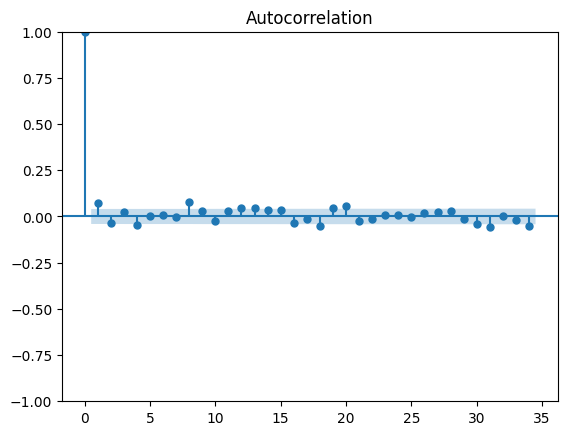

In [74]:
# ACF
plot_acf(close_price_diff)
plt.show()

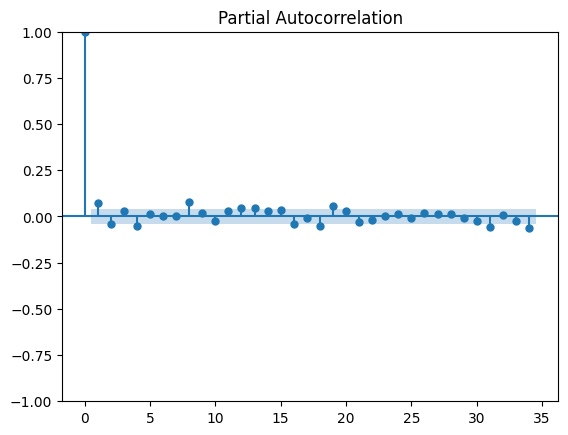

In [75]:
# PACF
plot_pacf(close_price_diff)
plt.show()

In [76]:
# Importa o modelo ARIMA para previsão de séries temporais
from statsmodels.tsa.arima.model import ARIMA

In [77]:
model = ARIMA(close_price, order=(2, 1, 5))  # Parâmetros (p, d, q)
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [78]:
# Resumo do modelo
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2335
Model:                 ARIMA(2, 1, 5)   Log Likelihood               -3463.910
Date:                Wed, 08 Jan 2025   AIC                           6943.820
Time:                        20:35:44   BIC                           6989.863
Sample:                    01-04-2016   HQIC                          6960.594
                         - 12-13-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0878      0.215      5.060      0.000       0.666       1.509
ar.L2         -0.0882      0.215     -0.410      0.682      -0.510       0.333
ma.L1         -1.0104      0.215     -4.701      0.0

In [96]:
# Faz previsão para o próximo dia
forecast = model_fit.get_forecast(steps=1)
forecast_ci = forecast.conf_int()

In [97]:
print(forecast.predicted_mean)

2024-12-16 05:00:00+00:00    248.344297
Freq: B, dtype: float64


In [94]:
from statsmodels.tools.eval_measures import rmse

In [95]:
# Calcular o erro médio quadrático (RMSE)
rmse_error = rmse(close_price[-30:], forecast.predicted_mean)
print(f'RMSE: {rmse_error}')

RMSE: 16.887890147737092


#Resíduos

In [86]:
residuos = model_fit.resid

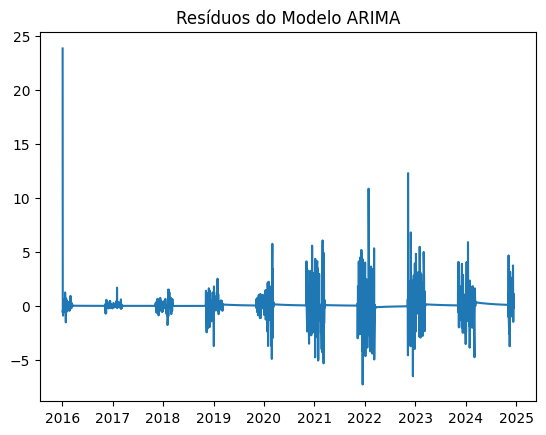

In [87]:
plt.plot(residuos)
plt.title('Resíduos do Modelo ARIMA')
plt.show()

In [88]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [89]:
lb_test = acorr_ljungbox(residuos, lags=[10], return_df=True)
print(lb_test)

      lb_stat  lb_pvalue
10  11.953036   0.288212


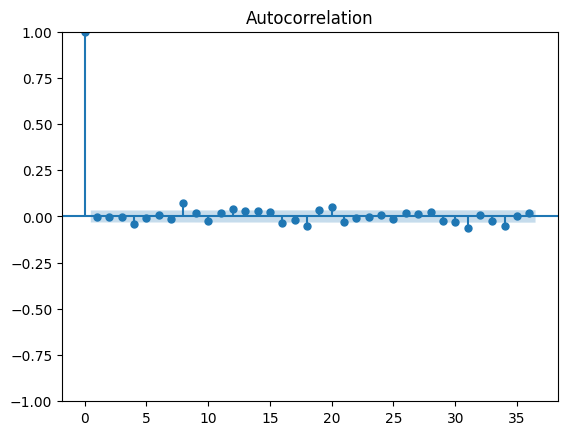

In [42]:
plot_acf(residuos)
plt.show()